# Setup

In [1]:
%reset -f

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import importlib, os

from lib import path_tools as pt
from lib import import_data

In [3]:
importlib.reload(import_data)

<module 'lib.import_data' from '/home/tomas/Documents/sciencetools_py/lib/import_data.py'>

In [144]:
pt.wipe_scrap()

# Set the technique we're working with today
# Valid values: 'xrd', 'pl', 'uvvis'
flag = "ftir"

In [145]:
# Identify the folder(s) where the raw, original data is
# Use a list to store multiple directories that you want ready to plot
FTIR_data = {}

# ETB-046 Variables
samples_dir = {
    "Solutions": "200122 Solutions/",
    "Solvents": "200122 Solvents/",
}

for run_ID in samples_dir.keys():
    FTIR_data[run_ID] = import_data.init(flag, samples_dir[run_ID])

Creating new local data folder.
Creating new local data folder.


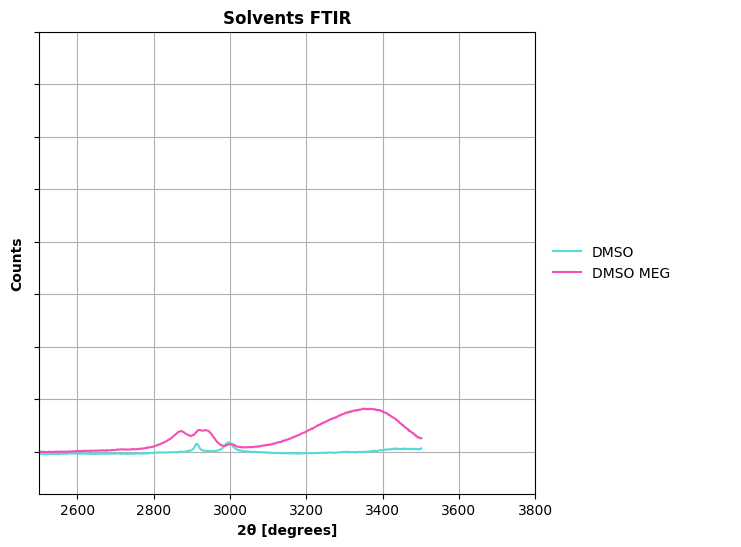

In [155]:
fig = plt.figure(1, figsize=[6.4, 6])
fig_ax = plt.gca()

offset = 0
lbl = None

master_cypher = (
#     "MAPbI DMF",
#     "MAPbI DMF MEG",
#     "MAPbI DMSO",
#     "MAPbI DMSO MEG",
#     "PbI2 DMF",
#     "PbI2 DMF MEG",
#     "PbI2 DMSO",
#     "PbI2 DMSO MEG",
#     "DMF",
#     "DMF+MEG",
    "DMSO",
    "DMSO MEG",
)

for sample_ID in master_cypher:
    for run_ID in samples_dir.keys():
        if sample_ID in FTIR_data[run_ID].keys():
#             samplemax = max(FTIR_data[run_ID][sample_ID]["Counts"])
            
#             if "PbI2 DMF " in sample_ID:
#                 lbl = sample_ID.replace("PbI2 DMF ", "")
#             elif "MAPbI DMF" in sample_ID:
#                 lbl = sample_ID.replace("MAPbI DMF ", "")
            
#             if "noMEG" in lbl:
#                 lbl = lbl.replace("noMEG", "No MEG")
#             elif "wMEG" in lbl:
#                 lbl = lbl.replace("wMEG", "With MEG")
                
            plt.figure(1)
            plt.plot(FTIR_data[run_ID][sample_ID]["Cm-1"], FTIR_data[run_ID][sample_ID]["Counts"] + offset,
                label=sample_ID)
            
            offset += 0
            lbl = None
            
plt.style.use('default')
sns.set_palette(sns.cubehelix_palette(4, rot=4, hue=2, light=0.7, dark=0.25))

plt.xlabel("2θ [degrees]", weight="semibold")
plt.ylabel("Counts", weight="semibold")

# plt.xlim(3,34)
# fig_ax.set_xlim(left=500)
plt.xlim(2500, 3800)
plt.ylim(-2E-2,2E-1)
plt.grid(which='both')

fig_ax.set_yticklabels([])

plt.title("Solvents FTIR",weight="semibold")
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.4,1),mode='expand', frameon=False)

In [153]:
fig.savefig("plots/final/FTIR/DMSO_600_1750.png", dpi=200, format='png', bbox_inches='tight')